# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download data

In [2]:
!wget "https://data.wa.gov/api/views/s8fv-s6fc/rows.csv" -O "Annual_Aggregated_County_Road_Mileage.csv"

zsh:1: command not found: wget


# Load data

In [3]:
df = pd.read_csv("Annual_Aggregated_County_Road_Mileage.csv")

# Handling missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7931 entries, 0 to 7930
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Calendar_Year               7931 non-null   int64  
 1   County_Order_Number         7931 non-null   int64  
 2   County_Name                 7931 non-null   object 
 3   Jurisdiction                7931 non-null   int64  
 4   Function_Class              7931 non-null   int64  
 5   Function_Class_Description  7931 non-null   object 
 6   Thru_Lane_Surface           7931 non-null   object 
 7   Is_Paved                    7931 non-null   bool   
 8   Truck_Route_Description     7851 non-null   object 
 9   Is_FGTS                     7931 non-null   bool   
 10  Is_CFGS                     7931 non-null   bool   
 11  Total_Lane_Miles            7931 non-null   float64
 12  Total_Centerline_Miles      7931 non-null   float64
dtypes: bool(3), float64(2), int64(4),

In [5]:
df.head(5)

,Calendar_Year,County_Order_Number,County_Name,Jurisdiction,Function_Class,Function_Class_Description,Thru_Lane_Surface,Is_Paved,Truck_Route_Description,Is_FGTS,Is_CFGS,Total_Lane_Miles,Total_Centerline_Miles
0,2020,1,Adams,5,7,Rural Major Collector,ACP,True,"T3 - 300,000 to 4,000,000",True,True,62.454,30.444
1,2020,1,Adams,5,7,Rural Major Collector,ACP,True,"T4 - 100,000 to 300,000",True,True,0.094,0.047
2,2020,1,Adams,5,7,Rural Major Collector,BST,True,Non Truck Route,False,False,0.960,0.480
3,2020,1,Adams,5,7,Rural Major Collector,BST,True,"T3 - 300,000 to 4,000,000",True,True,137.691,70.695
4,2020,1,Adams,5,7,Rural Major Collector,BST,True,"T4 - 100,000 to 300,000",True,True,174.350,88.300


In [6]:
df.describe()

,Calendar_Year,County_Order_Number,Jurisdiction,Function_Class,Total_Lane_Miles,Total_Centerline_Miles
count,7931.000000,7931.000000,7931.0,7931.000000,7931.000000,7931.000000
mean,2021.511789,20.935191,5.0,11.343715,39.420697,19.763233
std,1.118211,11.593214,0.0,4.586688,128.421454,65.010561
min,2020.000000,1.000000,5.0,6.000000,0.003000,0.003000
25%,2021.000000,11.000000,5.0,8.000000,1.000000,0.480000
50%,2022.000000,21.000000,5.0,9.000000,4.880000,2.300000
75%,2023.000000,32.000000,5.0,16.000000,23.797000,11.585000
max,2023.000000,39.000000,5.0,19.000000,1742.113000,913.972000


In [7]:
# Checking missing values in the dataset
df.isna().sum(axis=0)

Calendar_Year                  0
County_Order_Number            0
County_Name                    0
Jurisdiction                   0
Function_Class                 0
Function_Class_Description     0
Thru_Lane_Surface              0
Is_Paved                       0
Truck_Route_Description       80
Is_FGTS                        0
Is_CFGS                        0
Total_Lane_Miles               0
Total_Centerline_Miles         0
dtype: int64

In [8]:
print("Shape of the dataframe before dropping", df.shape)

# Dropping all rows with Truck_Route_Description as null
# dropping 80 rows - ~1%
df = df.dropna(subset=['Truck_Route_Description'])

print("Shape of the dataframe after dropping", df.shape)

Shape of the dataframe before dropping (7931, 13)
Shape of the dataframe after dropping (7851, 13)


In [9]:
df.isna().sum(axis=0)

Calendar_Year                 0
County_Order_Number           0
County_Name                   0
Jurisdiction                  0
Function_Class                0
Function_Class_Description    0
Thru_Lane_Surface             0
Is_Paved                      0
Truck_Route_Description       0
Is_FGTS                       0
Is_CFGS                       0
Total_Lane_Miles              0
Total_Centerline_Miles        0
dtype: int64

# Analysis and visualizations

## Total lane miles FGTS and CFGS approved, over year

In [10]:
results = {}
for group_id, group in df.groupby(["Calendar_Year"]):
  results[group_id[0]] = {
      "Total_Lane_Miles_FGTS": group[group.Is_FGTS].Total_Lane_Miles.sum(),
      "Total_Lane_Miles_CFGS": group[group.Is_CFGS].Total_Lane_Miles.sum(),
      "Total_Lane_Miles": group.Total_Lane_Miles.sum()
  }
miles_fgts_cfgs = pd.DataFrame(results).T
miles_fgts_cfgs = miles_fgts_cfgs.reset_index().melt(id_vars='index', value_vars=['Total_Lane_Miles', 'Total_Lane_Miles_FGTS', 'Total_Lane_Miles_CFGS'], var_name='Category', value_name='Miles')

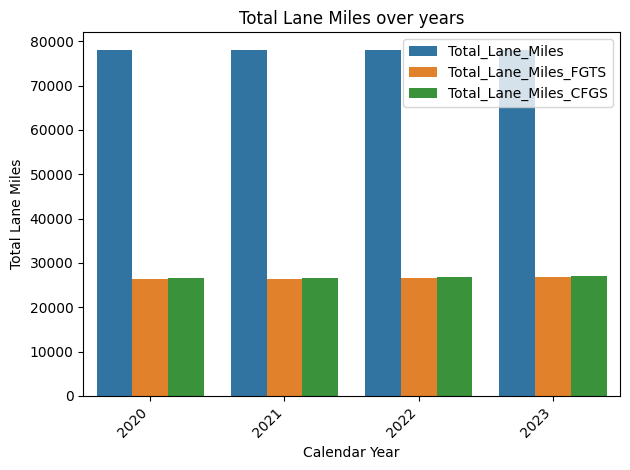

In [11]:
plt.figure()
sns.barplot(data=miles_fgts_cfgs, x='index', y='Miles', hue='Category')
plt.xlabel('Calendar Year')
plt.ylabel('Total Lane Miles')
plt.title('Total Lane Miles over years')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Total lane miles Paved, over years

In [12]:
results = {}
for group_id, group in df.groupby(["Calendar_Year"]):
  results[group_id[0]] = {
      "Total_Lane_Miles_IsPaved": group[group.Is_Paved].Total_Lane_Miles.sum(),
      "Total_Lane_Miles": group.Total_Lane_Miles.sum()
  }
miles_paved = pd.DataFrame(results).T
miles_paved = miles_paved.reset_index().melt(id_vars='index', value_vars=['Total_Lane_Miles', 'Total_Lane_Miles_IsPaved'], var_name='Category', value_name='Miles')

In [13]:
# miles_paved

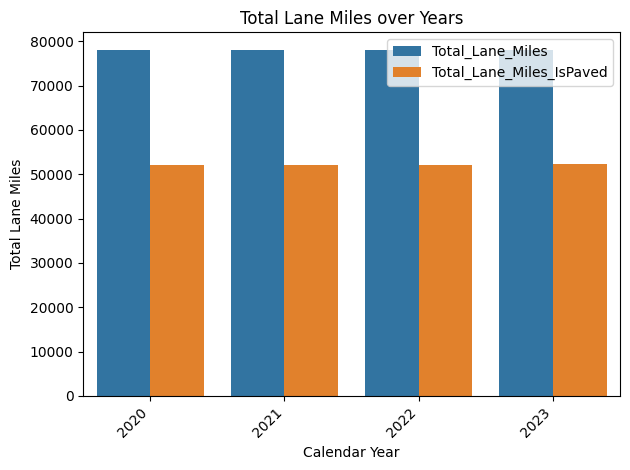

In [14]:
plt.figure()
sns.barplot(data=miles_paved, x='index', y='Miles', hue='Category')
plt.xlabel('Calendar Year')
plt.ylabel('Total Lane Miles')
plt.title('Total Lane Miles over Years')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Total lane miles Paved/NonPaved in Function Class

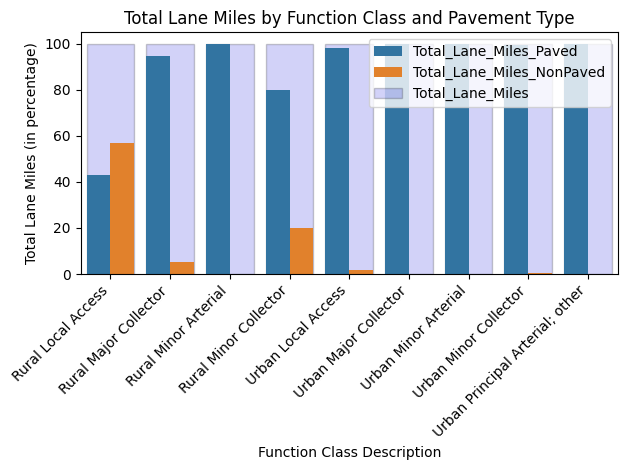

In [15]:
results = {}
for group_id, group in df.groupby(["Function_Class_Description"]):
  results[group_id] = {
      "Total_Lane_Miles_Paved": group[group.Is_Paved].Total_Lane_Miles.sum(),
      "Total_Lane_Miles_NonPaved": group[~group.Is_Paved].Total_Lane_Miles.sum(),
      "Total_Lane_Miles": group.Total_Lane_Miles.sum()
  }

miles_by_function_class = pd.DataFrame(results).T
miles_by_function_class["Total_Lane_Miles_NonPaved"] = miles_by_function_class["Total_Lane_Miles_NonPaved"] / miles_by_function_class["Total_Lane_Miles"] * 100
miles_by_function_class["Total_Lane_Miles_Paved"] = miles_by_function_class["Total_Lane_Miles_Paved"] / miles_by_function_class["Total_Lane_Miles"] * 100
miles_by_function_class["Total_Lane_Miles"] = miles_by_function_class["Total_Lane_Miles"] / miles_by_function_class["Total_Lane_Miles"] * 100

plt.figure()
sns.barplot(data=miles_by_function_class.reset_index(), x='level_0', y='Total_Lane_Miles', color="blue", edgecolor="black", alpha=0.2, label="Total_Lane_Miles")

miles_by_function_class = miles_by_function_class.reset_index().melt(id_vars='level_0', value_vars=['Total_Lane_Miles_Paved', 'Total_Lane_Miles_NonPaved'], var_name='Category', value_name='Miles')
miles_by_function_class = miles_by_function_class.rename(columns={'level_0': 'Function_Class_Description'})

sns.barplot(data=miles_by_function_class, x='Function_Class_Description', y='Miles', hue='Category')
plt.xlabel('Function Class Description')
plt.ylabel('Total Lane Miles (in percentage)')
plt.title('Total Lane Miles by Function Class and Pavement Type')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Total lane miles in top 5 counties with highest total lane miles

In [16]:
counties = df.groupby("County_Name").agg({"Total_Lane_Miles": "sum"}).sort_values("Total_Lane_Miles", ascending=False).head(5).index

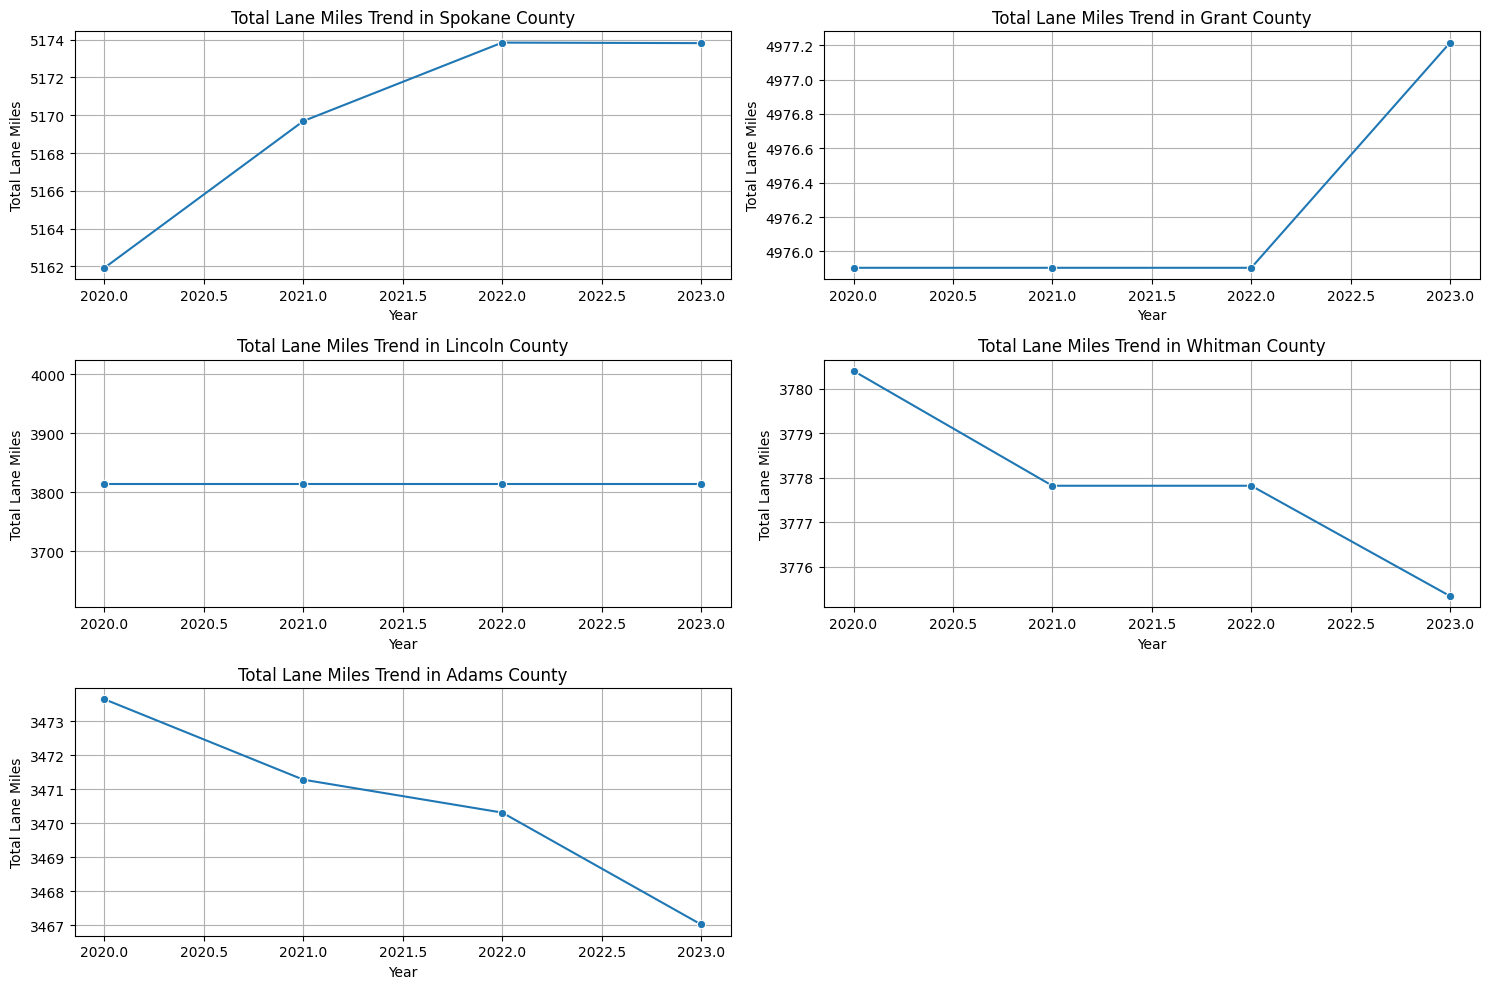

In [17]:
plt.figure(figsize=(15, 10))

for i, county in enumerate(counties):
    plt.subplot(3, 2, i + 1)
    sns.lineplot(x="Calendar_Year", y="Total_Lane_Miles", data=df[df.County_Name == county].groupby("Calendar_Year").agg({"Total_Lane_Miles": "sum"}), marker="o")
    plt.title(f"Total Lane Miles Trend in {county} County")
    plt.xlabel("Year")
    plt.ylabel("Total Lane Miles")
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Top 10 counties with highest total lane miles over years

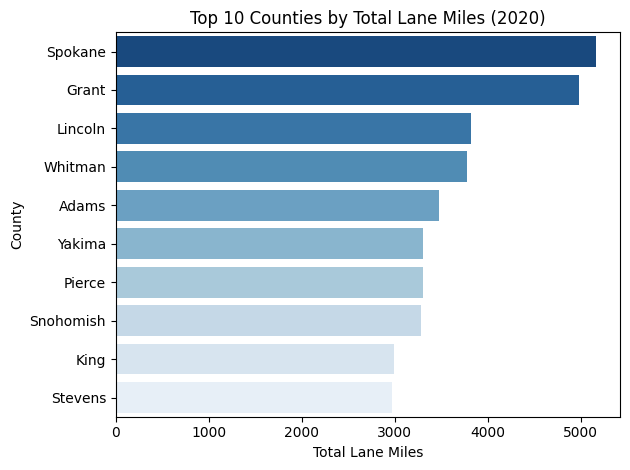

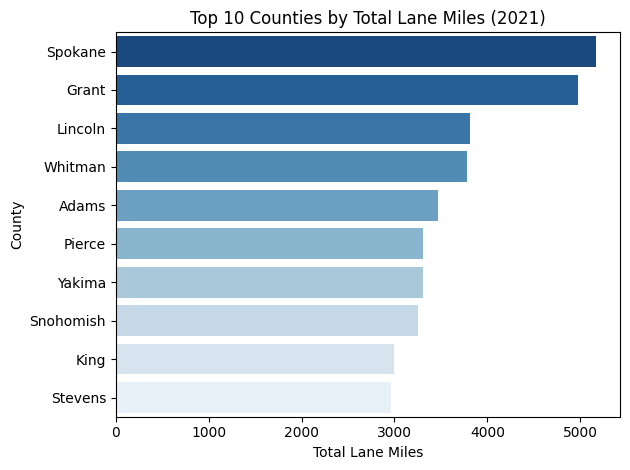

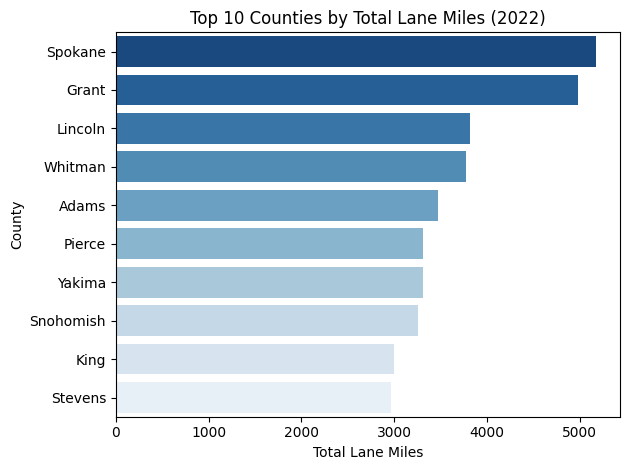

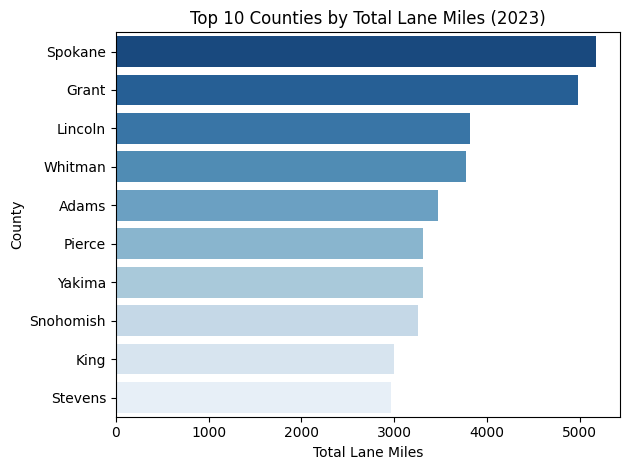

In [18]:
for year in sorted(df.Calendar_Year.unique()):
    county_miles = df[df.Calendar_Year==year].groupby("County_Name").agg({"Total_Lane_Miles": "sum"}).nlargest(10, "Total_Lane_Miles")

    plt.figure()
    sns.barplot(x="Total_Lane_Miles", y="County_Name", hue="County_Name", legend=False, data=county_miles, palette="Blues_r")
    plt.title(f"Top 10 Counties by Total Lane Miles ({year})")
    plt.xlabel("Total Lane Miles")
    plt.ylabel("County")
    plt.tight_layout()
    plt.show()

## Rank of Counties by Total_Centerline_Miles Over Time

In [19]:
df_rank = pd.DataFrame()
for year in [2020, 2021, 2022, 2023]:
    x = df.groupby(['Calendar_Year', 'County_Name'])['Total_Centerline_Miles'].sum()[year].reset_index().sort_values("Total_Centerline_Miles")
    x["rank"] = x.Total_Centerline_Miles.rank(ascending=False, method="max")
    x["year"] = year
    df_rank = pd.concat([df_rank, x], axis=0)

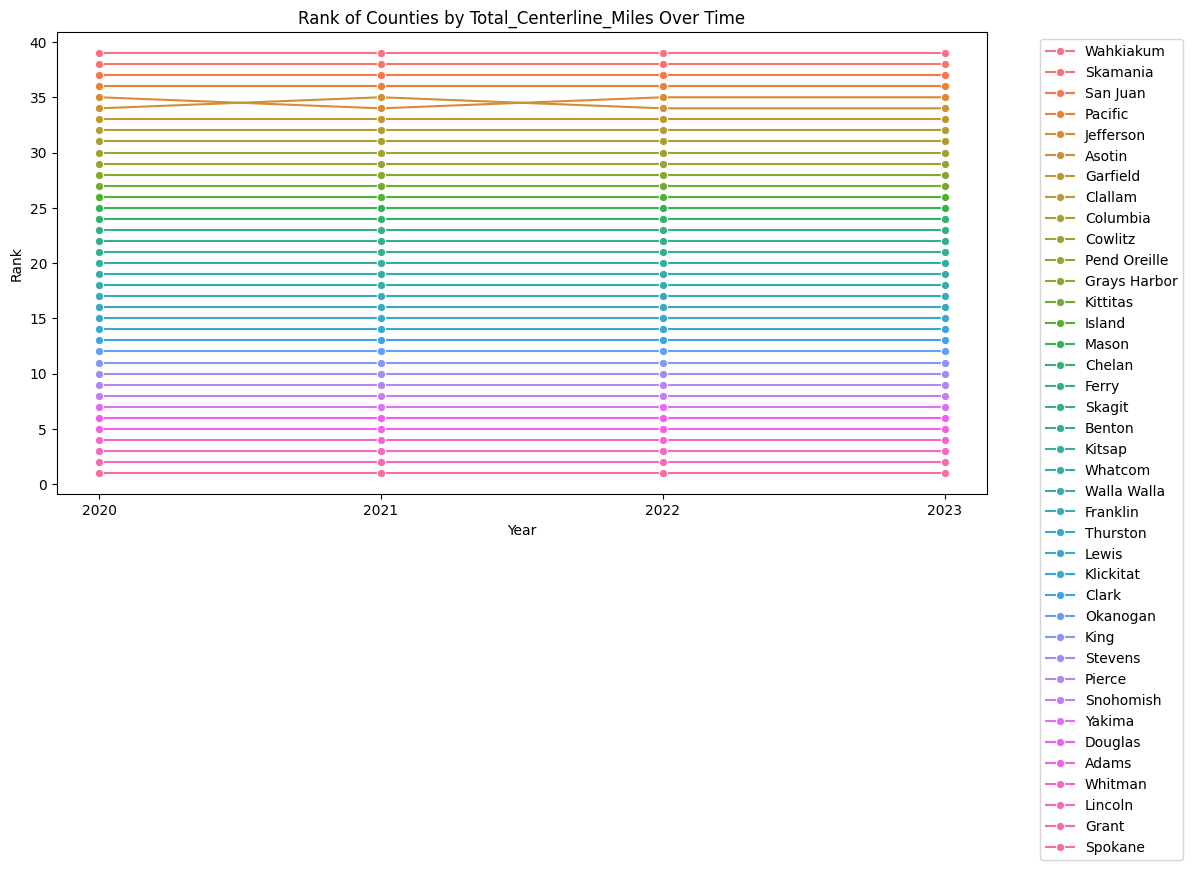

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rank', hue='County_Name', data=df_rank, marker='o')
plt.title('Rank of Counties by Total_Centerline_Miles Over Time')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.xticks(sorted(df_rank['year'].unique()))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Thru Surface composition over years 

In [21]:
stats_by_thru_surface = df.groupby('Calendar_Year').Thru_Lane_Surface.value_counts()
percent_thru_surface = stats_by_thru_surface/stats_by_thru_surface.groupby(['Calendar_Year']).sum() * 100
percent_thru_surface = percent_thru_surface.reset_index()

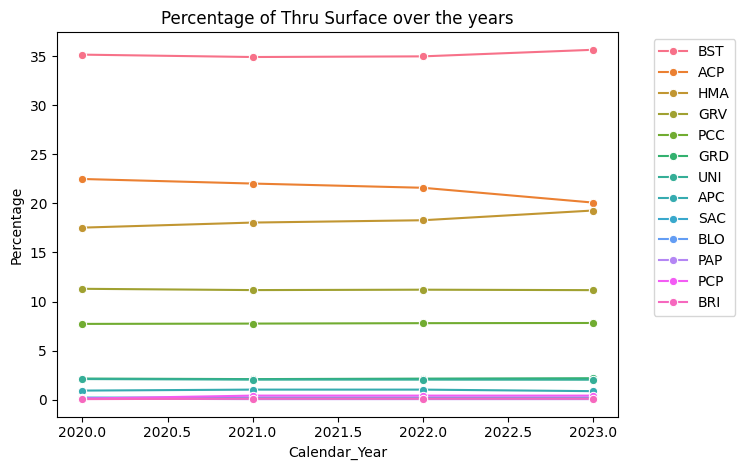

In [22]:
plt.figure()
sns.lineplot(data=percent_thru_surface, x='Calendar_Year', y='count', hue='Thru_Lane_Surface', marker="o")
plt.title(f"Percentage of Thru Surface over the years")
plt.xlabel("Calendar_Year")
plt.ylabel("Percentage")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Thru Lane Surface Trends Across Counties

In [23]:
test = df.groupby(["Calendar_Year", "County_Name", "Thru_Lane_Surface"]).count().reset_index()[["County_Name", "Thru_Lane_Surface", "Calendar_Year", "Function_Class"]]
test = test.groupby(["County_Name", "Thru_Lane_Surface"]).Function_Class.mean().reset_index()

pivot_table = test.pivot_table(index="County_Name", columns="Thru_Lane_Surface", values="Function_Class")

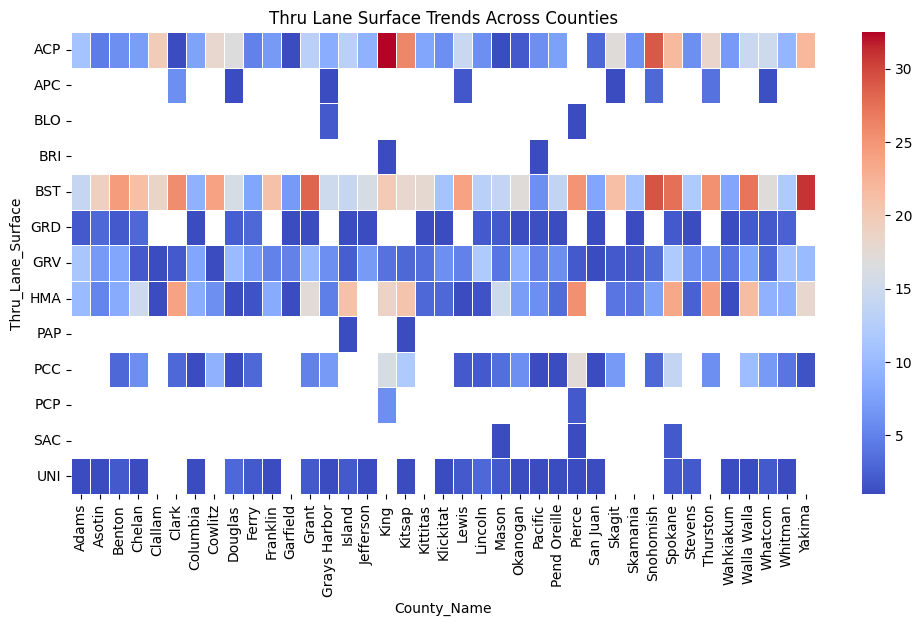

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table.T, cmap="coolwarm", annot=False, fmt=".1f", linewidths=0.5)
plt.title("Thru Lane Surface Trends Across Counties")
plt.xlabel("County_Name")
plt.ylabel("Thru_Lane_Surface")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Truck Route Distribution Across Function Class

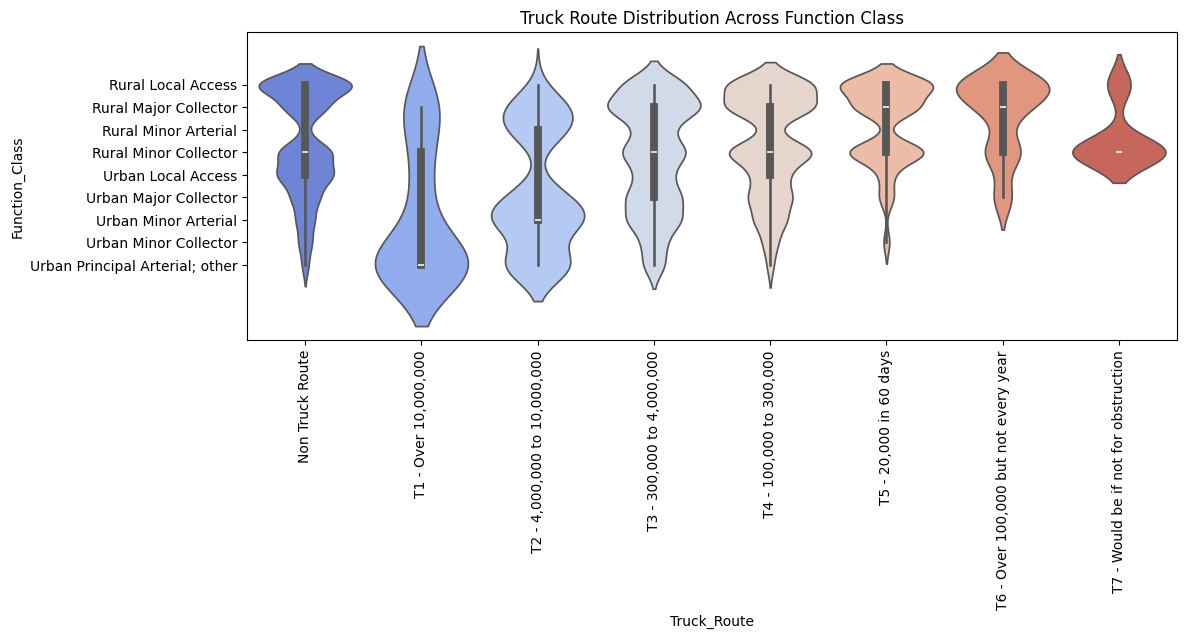

In [25]:
plt.figure(figsize=(12,4))
sns.violinplot(df.sort_values(["Truck_Route_Description", "Function_Class_Description"]), 
               x="Truck_Route_Description", y="Function_Class_Description", palette="coolwarm", 
               hue="Truck_Route_Description")
plt.title("Truck Route Distribution Across Function Class")
plt.xlabel("Truck_Route")
plt.ylabel("Function_Class")
plt.xticks(rotation=90)
plt.show()